<a href="https://colab.research.google.com/github/powerlock/FourthBrainAssignments/blob/main/Ecommerce_purchase_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import modules, authenticate google drive access

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## 1. Data exploration



####1.1 Import data

In [3]:
id = '1EW37JE8wS8xDzUh6ow7YG3FpF2LVl_33'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('online_shoppers_intention.csv.gz')  

In [4]:
shopper = pd.read_csv('online_shoppers_intention.csv.gz')

In [5]:
shopper.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
shopper.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
shopper.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [8]:
shopper.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

####1.1.1 Null values exploration

In [9]:
shopper.isnull().sum(axis=0).sort_values(ascending=False)


Administrative             0
Administrative_Duration    0
Weekend                    0
VisitorType                0
TrafficType                0
Region                     0
Browser                    0
OperatingSystems           0
Month                      0
SpecialDay                 0
PageValues                 0
ExitRates                  0
BounceRates                0
ProductRelated_Duration    0
ProductRelated             0
Informational_Duration     0
Informational              0
Revenue                    0
dtype: int64

####1.1.2 Unique values and covert to numerical values

In [10]:
shopper.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

*Something interesting*

1.   Only ten months data present. Which months are missing?
2.   6 special days. Which holidays are shown here?
3.   311 related product. Are these products all new products? What are these purchased rate?






#### 1.1.3 split data to train and test data
Training data is June to December,
Test data is Feb.-March

In [11]:
shopper['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [12]:
df_train = shopper[shopper['Month'].isin(['Feb','Mar'])]
df_test = shopper[shopper['Month'].isin(['June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'])]

###1.2 Use different types of feature to describe data.

In [13]:
target = ['Revenue']
cat_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration']
num_features = ['BounceRates', 'ExitRates', 'PageValues']
other_factors =['SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']

In [14]:
y = df_train[target]
df_cat = df_train[cat_features]
df_num = df_train[num_features]
df_factor = df_train[other_factors]

### 1.3 Plot numeric features distribution to see if any abnormal or correlations.

                                 Numeric Features Distribution                                  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

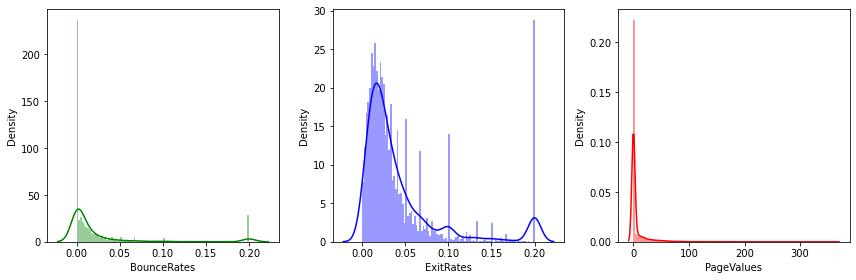

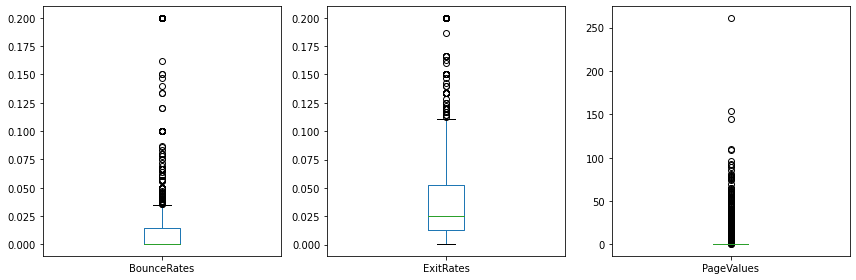

In [15]:
print('\033[1mNumeric Features Distribution'.center(100))

figsize = (12, 4)

n=len(num_features)
colors = ['g', 'b', 'r', 'y', 'k']

# histogram
plt.figure(figsize=figsize)
for i in range(len(num_features)):
    plt.subplot(1,n,i+1)
    sns.distplot(shopper[num_features[i]],
                 bins=100, 
                 color = colors[i])
plt.tight_layout();

plt.figure(figsize=figsize)
for i in range(len(num_features)):
    plt.subplot(1,n,i+1)
    df_train.boxplot(num_features[i], grid=False)
plt.tight_layout();

### 1.4 Any correlations between revenue and other_factors or cat_features?

In [16]:
non_num = ['Month', 'VisitorType','Weekend', 'Revenue']
for c in non_num:
  print(df_train[c].unique())

['Feb' 'Mar']
['Returning_Visitor' 'New_Visitor']
[False  True]
[False  True]


In [17]:
month_mask = {s:i+1 for  i, s in enumerate(['Jan','Feb', 'Mar','Apr', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec'])}
vistor_mask = {s:i+1 for  i, s in enumerate(['Returning_Visitor', 'New_Visitor', 'Other'])}
binary_mask = {s:i for  i, s in enumerate(['False', 'True'])}

In [18]:
print(month_mask)

{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Oct': 6, 'June': 7, 'Jul': 8, 'Aug': 9, 'Nov': 10, 'Sep': 11, 'Dec': 12}


In [19]:
df = df_train.copy()

In [20]:
# change non-numerical value to numeric with the above mask
mask = [month_mask,vistor_mask,binary_mask,binary_mask]
for c in range(len(non_num)):
  df[non_num[c]] = df[non_num[c]].replace(mask[c])

df['Weekend'] = df['Weekend'].astype(int) # Use 1 and 0 to represent Ture and False
df['Revenue'] = df['Revenue'].astype(int)

In [21]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,1,0,0


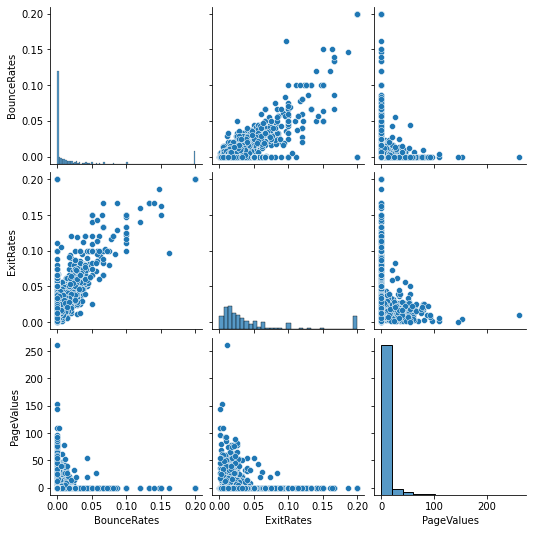

In [22]:
sns.pairplot(df_num)

Missing Jan, and April data

### Do the same for test data

In [23]:

for c in range(len(non_num)):
  df_test[non_num[c]] = df_test[non_num[c]].replace(mask[c])

df_test['Weekend'] = df_test['Weekend'].astype(int) # Use 1 and 0 to represent Ture and False
df_test['Revenue'] = df_test['Revenue'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

                                   Cat Features Distribution                                    


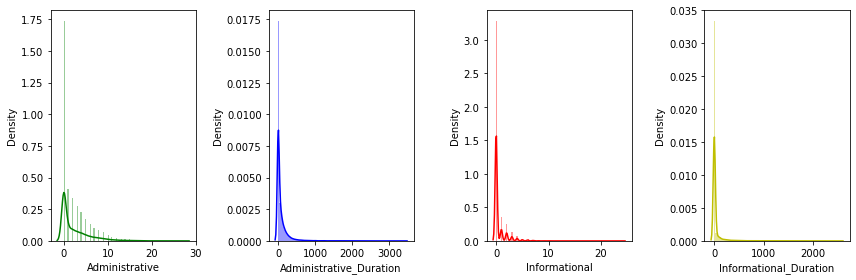

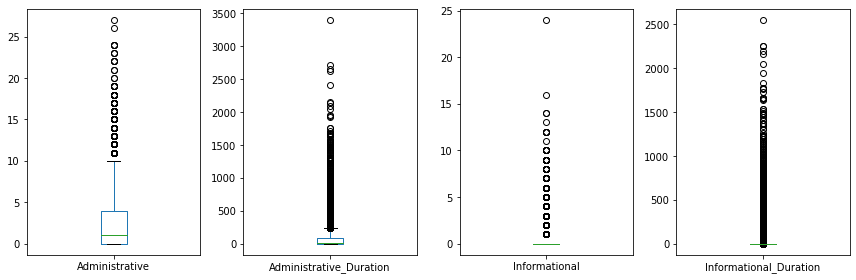

In [24]:
import warnings
warnings.filterwarnings("ignore")
print('\033[1mCat Features Distribution'.center(100))

figsize = (12, 4)

n=len(cat_features)
colors = ['g', 'b', 'r', 'y', 'k']

# histogram
plt.figure(figsize=figsize)
for i in range(len(cat_features)):
    plt.subplot(1,n,i+1)
    sns.distplot(shopper[cat_features[i]],
                 bins=100, 
                 color = colors[i])
plt.tight_layout();

plt.figure(figsize=figsize)
for i in range(len(cat_features)):
    plt.subplot(1,n,i+1)
    shopper.boxplot(cat_features[i], grid=False)
plt.tight_layout();

                                   Other Factors Distribution                                   


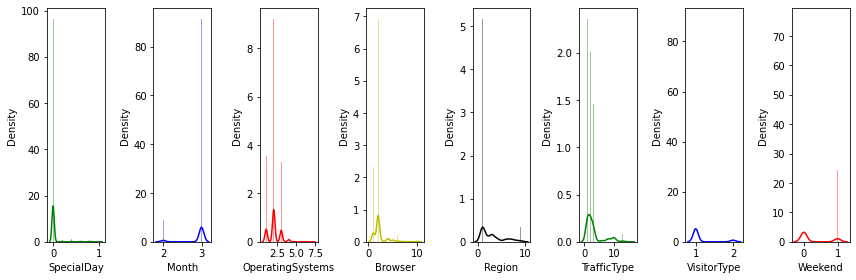

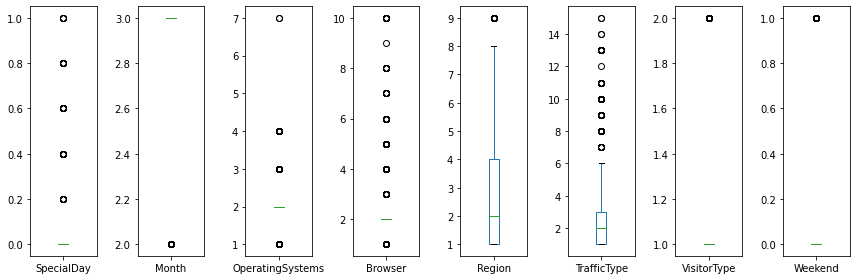

In [25]:
print('\033[1mOther Factors Distribution'.center(100))

figsize = (12, 4)

n=len(other_factors)
colors = ['g', 'b', 'r', 'y', 'k','g','b','r']

# histogram
plt.figure(figsize=figsize)
for i in range(len(other_factors)):
    plt.subplot(1,n,i+1)
    sns.distplot(df[other_factors[i]],
                 bins=100, 
                 color = colors[i])
plt.tight_layout();

plt.figure(figsize=figsize)
for i in range(len(other_factors)):
    plt.subplot(1,n,i+1)
    df.boxplot(other_factors[i], grid=False)
plt.tight_layout();



1.   Month shows peak patterns: 
2.   Vistor type 1 has more
3. less weekend



In [26]:
y.describe()

,Revenue
count,2091
unique,2
top,False
freq,1896


1.4 Split data before feature engineering to avoid data leak issue

In [27]:
from sklearn.model_selection import train_test_split

## 2. Feature engineering


###2.1 Visulize correlation, remove highly correlated features

In [28]:
small_df = df.copy().sample(n=int(1000), random_state=12) 

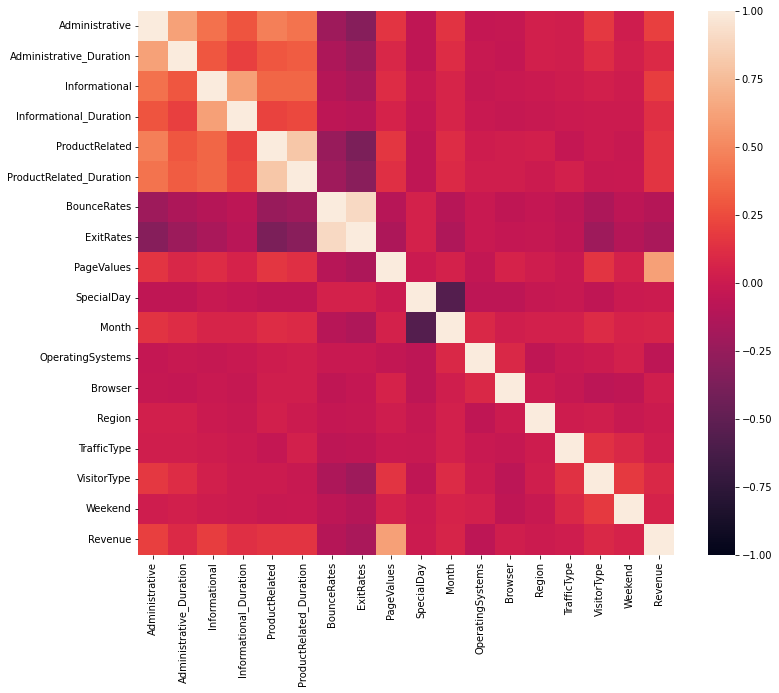

In [29]:
plt.figure(figsize=(12,10))
cor = small_df.corr()
sns.heatmap(cor, vmin = -1, vmax = 1)

In [30]:
keep_columns = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8): # 0.8 is the correlation threshold
            keep_columns[j] = False
selected_columns = df.columns[keep_columns]
df_reduced = df[selected_columns]

In [31]:
X = df_reduced.drop(columns=['Revenue'])
y = df_reduced['Revenue']

### Do the same for the test data

In [32]:
df_test_reduced = df_test[selected_columns]
X_test = df_test_reduced.drop(columns=['Revenue'])
y_test = df_test_reduced['Revenue']

In [33]:
print("selected features: ", len(X.columns),X.columns)

selected features:  15 Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend'],
      dtype='object')


In [34]:
df_reduced.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.2,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,0.0,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.2,0.0,0.0,2,4,1,9,3,1,0,0


###2.2 Selected features vs revenue visulization

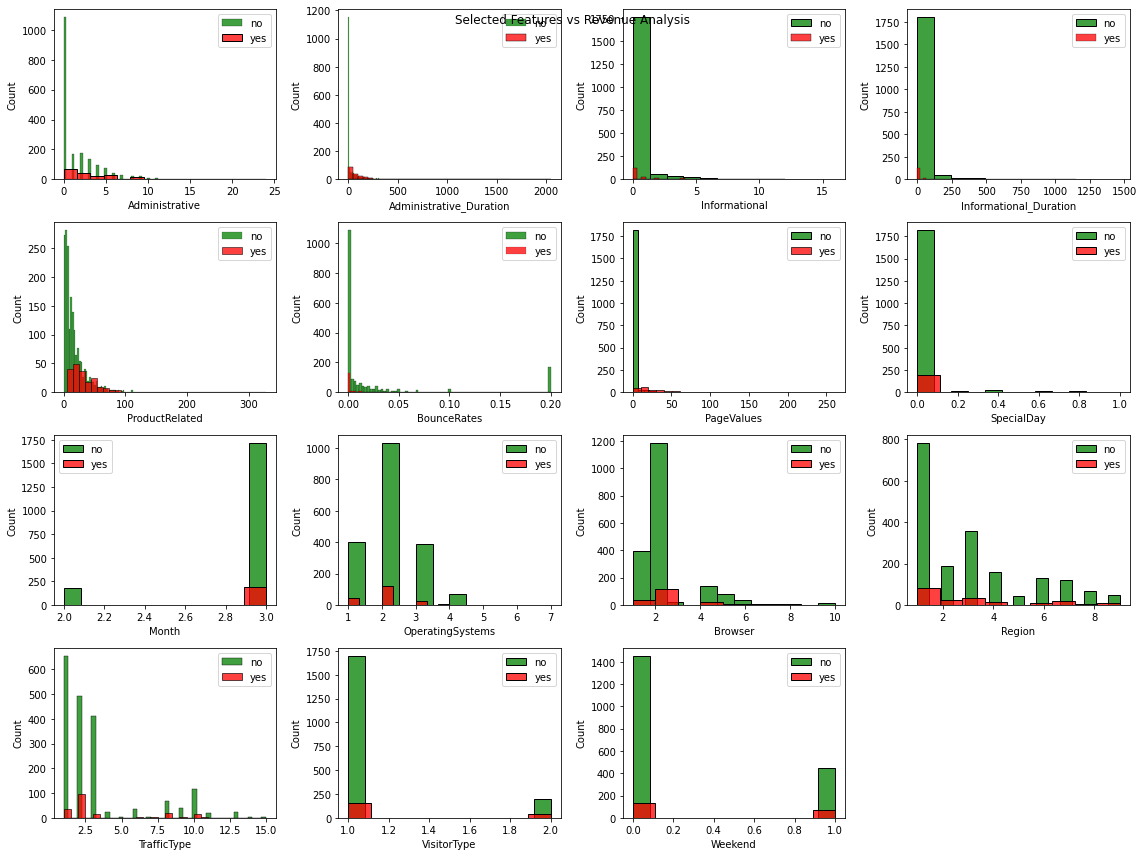

In [35]:
j = 0
fig = plt.figure(figsize=(16, 12))
for i in range(len(selected_columns)-1):
  plt.subplot(4,4,j+1 )
  j += 1
  d = df_reduced[selected_columns[i]]
  sns.histplot(d[df_reduced['Revenue'] == 0], color='g', label='no' )
  sns.histplot(d[df_reduced['Revenue'] == 1], color='r', label='yes' )
  plt.legend(loc='best')
fig.suptitle("Selected Features vs Revenue Analysis")
fig.subplots_adjust(top=1.05);
fig.tight_layout()

In [36]:
print("False class percentage is ",100* df_reduced[df_reduced['Revenue']==0].shape[0]/df_reduced.shape[0], "%")

False class percentage is  90.67431850789096 %


Informational duration show very few yes data for revenue.
Other featurs show more or less the same pattern for yes and no.
Imbalanced data should be taken into consideration before training models.

### 2.3 Scaling, normalize Adminstrative duration, infromational duration and numerical features, so they are in the same scale.

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_x = df_reduced[['Administrative_Duration','Informational_Duration','BounceRates','PageValues']]
                  
df_reduced[['Administrative_Duration_norm','Informational_Duration_norm','BounceRates_norm','PageValues_norm']] = scaler.fit_transform(norm_x)
df_reduced.drop(columns=['Administrative_Duration','Informational_Duration','BounceRates','PageValues'],axis = 1, inplace=True)

In [38]:
df_reduced.describe()

,Administrative,Informational,ProductRelated,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administrative_Duration_norm,Informational_Duration_norm,BounceRates_norm,PageValues_norm
count,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2.091000e+03,2.091000e+03,2.091000e+03,2.091000e+03
mean,1.769488,0.391200,19.049737,0.020564,2.912004,2.064562,2.281683,3.000956,3.142994,1.111430,0.243424,0.093257,-1.699050e-17,-1.953908e-17,-6.796200e-18,-4.077720e-17
std,2.780218,1.179976,22.883550,0.113820,0.283357,0.762232,1.402849,2.331806,2.972300,0.314739,0.429252,0.290862,1.000239e+00,1.000239e+00,1.000239e+00,1.000239e+00
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-3.972724e-01,-2.438402e-01,-4.365093e-01,-2.678064e-01
25%,0.000000,0.000000,5.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-3.972724e-01,-2.438402e-01,-4.365093e-01,-2.678064e-01
50%,0.000000,0.000000,12.000000,0.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,-3.972724e-01,-2.438402e-01,-4.365093e-01,-2.678064e-01
75%,3.000000,0.000000,25.000000,0.000000,3.000000,2.000000,2.000000,4.000000,3.000000,1.000000,0.000000,0.000000,-1.463651e-02,-2.438402e-01,-1.761783e-01,-2.678064e-01
max,24.000000,16.000000,328.000000,1.000000,3.000000,7.000000,10.000000,9.000000,15.000000,2.000000,1.000000,1.000000,1.184250e+01,1.244800e+01,3.208125e+00,1.871234e+01


### Do the same for test data

In [39]:
norm_x_test = df_test_reduced[['Administrative_Duration','Informational_Duration','BounceRates','PageValues']]
                  
df_test_reduced[['Administrative_Duration_norm','Informational_Duration_norm','BounceRates_norm','PageValues_norm']] = scaler.fit_transform(norm_x_test)
df_test_reduced.drop(columns=['Administrative_Duration','Informational_Duration','BounceRates','PageValues'],axis = 1, inplace=True)

In [40]:
X_test_new = df_test_reduced.drop(columns=['Revenue'])
y_test_new = df_test_reduced['Revenue']

## 3. Data subsampling

In [41]:
print("True class of revenue is ",df_reduced[df_reduced['Revenue']==1].shape[0])

True class of revenue is  195


In [42]:
true_re = df_reduced[df_reduced['Revenue']==1]
false_re = df_reduced[df_reduced['Revenue']==0][:195]
norm_dist_df = pd.concat([true_re, false_re])

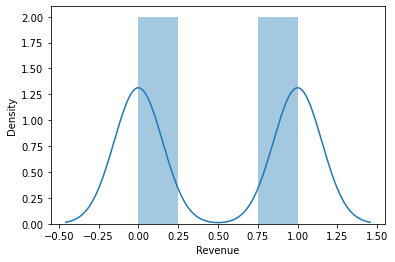

In [43]:
sns.distplot(norm_dist_df['Revenue'])

In [44]:
X_new = norm_dist_df.drop(columns=['Revenue'])

y_new = norm_dist_df[['Revenue']]

In [45]:
print(X_new.shape, y_new.shape)

(390, 15) (390, 1)


In [46]:
X_norm = df_reduced.drop(columns=['Revenue'])
y_norm = df_reduced[['Revenue']]


## 4. Classification models
###4.1 Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### test with subsampling 

In [48]:
%%time
LR = LogisticRegression()
LR.fit(X_new, y_new)
LR_pred = LR.predict(X_test_new)

CPU times: user 54.3 ms, sys: 5.99 ms, total: 60.3 ms
Wall time: 110 ms


In [49]:
X_new.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'SpecialDay',
       'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Administrative_Duration_norm',
       'Informational_Duration_norm', 'BounceRates_norm', 'PageValues_norm'],
      dtype='object')

In [50]:
print(classification_report(y_test_new, LR_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5093
           1       0.19      1.00      0.33      1233

    accuracy                           0.19      6326
   macro avg       0.10      0.50      0.16      6326
weighted avg       0.04      0.19      0.06      6326



### Test without subsampling

In [51]:
%%time
LR_N = LogisticRegression()
LR_N.fit(X_norm, y_norm)
LR_pred_orig = LR_N.predict(X_test_new)
print("Report before subsampling")
print(classification_report(y_test_new, LR_pred_orig))

Report before subsampling
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5093
           1       0.69      0.34      0.45      1233

    accuracy                           0.84      6326
   macro avg       0.78      0.65      0.68      6326
weighted avg       0.83      0.84      0.82      6326

CPU times: user 131 ms, sys: 135 ms, total: 267 ms
Wall time: 236 ms


### 4.2 SVM

### SVM with sub-sampling

In [52]:
from sklearn.svm import SVC

In [53]:
%%time
svm = SVC(kernel = 'linear',random_state=0)
svm.fit(X_new, y_new)
svm_pred = svm.predict(X_test_new)
print(classification_report(y_test_new, svm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5093
           1       0.19      1.00      0.33      1233

    accuracy                           0.19      6326
   macro avg       0.10      0.50      0.16      6326
weighted avg       0.04      0.19      0.06      6326

CPU times: user 103 ms, sys: 29.1 ms, total: 132 ms
Wall time: 174 ms


### SVM without subsampling

In [54]:
%%time
svm_n = SVC(kernel = 'linear',random_state=0)
svm_n.fit(X_norm,y_norm)
svm_pred_norm = svm_n.predict(X_test_new)
print(classification_report(y_test_new, svm_pred_norm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5093
           1       0.19      1.00      0.33      1233

    accuracy                           0.19      6326
   macro avg       0.10      0.50      0.16      6326
weighted avg       0.04      0.19      0.06      6326

CPU times: user 2.41 s, sys: 15.9 ms, total: 2.43 s
Wall time: 3.05 s


###4.3 Random Forest and Feature importance

test with subsampling

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call

In [56]:
RF = RandomForestClassifier(max_depth =5)
RF.fit(X_new, y_new)
rf_pred = RF.predict(X_test_new)
print(classification_report(y_test_new , rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5093
           1       0.59      0.69      0.64      1233

    accuracy                           0.85      6326
   macro avg       0.75      0.79      0.77      6326
weighted avg       0.86      0.85      0.85      6326



In [57]:
export_graphviz(RF.estimators_[0], max_depth=5, out_file='tree.dot', 
                feature_names = selected_columns[:-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

Feature ranking:
1. PageValues_norm (feature 14) (0.375309)
2. Month (feature 4) (0.255033)
3. Administrative_Duration_norm (feature 11) (0.091557)
4. ProductRelated (feature 2) (0.071777)
5. Administrative (feature 0) (0.071460)
6. SpecialDay (feature 3) (0.044815)
7. Informational_Duration_norm (feature 12) (0.022610)
8. BounceRates_norm (feature 13) (0.020488)
9. TrafficType (feature 8) (0.015348)
10. VisitorType (feature 9) (0.009463)
11. Informational (feature 1) (0.008952)
12. Browser (feature 6) (0.004435)
13. Region (feature 7) (0.004160)
14. OperatingSystems (feature 5) (0.003225)
15. Weekend (feature 10) (0.001368)


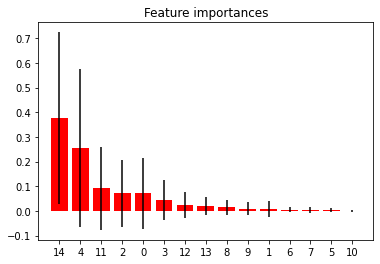

In [58]:
# Use Random Forest to get feature ranks/importances for each feature
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_new.shape[1]):
    print("%d. %s (feature %d) (%f)" %
          (f + 1, X_new.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_new.shape[1]), indices)
plt.xlim([-1, X_new.shape[1]]);

##4.4 Conclusion: 

* 1.With subsampling, logistic regression shows higher recall for class 'True', 
  it can predict 100% for class 'True' which is important. However, for class  'False' it is 0%, means it is really bad to predict 'false' class.

* 2. With or without subsampling, linear SVM shows exact the same recall 100% which is a good model. However, the recall for 'false' class is 0%

* 3. Random forest shows page values, Month and administrative duration show the most import features. The f1 score is higher than the logistic regression and SVM.

## 5. Performance check for models

## 5.1 ROC test for three different classifiers w/o subsampling

In [59]:
from sklearn.metrics import plot_roc_curve

### Subsampling performance

Text(0.5, 1.0, 'Three Classifiers ROC comparison')

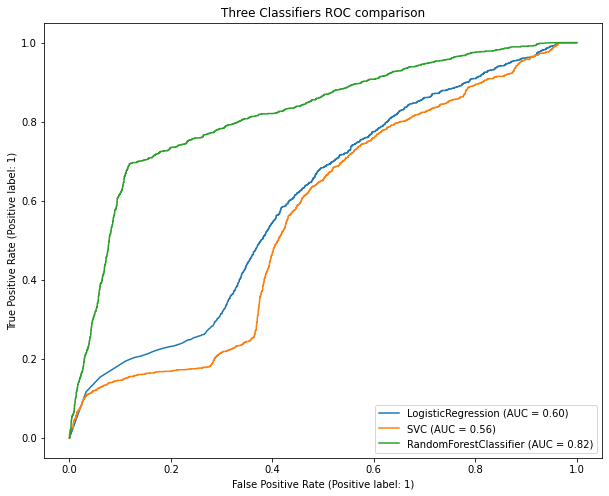

In [60]:

classifiers = [LR,svm, RF]
plt.figure(figsize=(10,8))
ax = plt.gca()
for c in range(len(classifiers)):
  
  plot_roc_curve(classifiers[c],X_test_new,y_test_new,ax=ax)
plt.title('Three Classifiers ROC comparison')

### Without subsampling performance

Text(0.5, 1.0, 'Three Classifiers ROC comparison with Imbalanced class data')

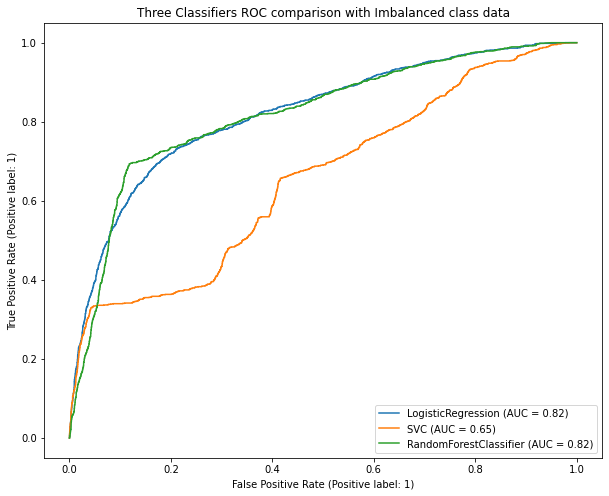

In [61]:
classifiers = [LR_N,svm_n, RF]
plt.figure(figsize=(10,8))
ax = plt.gca()
for c in range(len(classifiers)):
  
  plot_roc_curve(classifiers[c],X_test_new,y_test_new,ax=ax)
plt.title('Three Classifiers ROC comparison with Imbalanced class data')

*The imbalanced class data shows a better result than the subsampling*

##5.2 Random Forest n estimators factor?

In [62]:
from sklearn.metrics import roc_curve, auc, balanced_accuracy_score, f1_score
n = [10, 50, 100, 500,1000 ]
for i in n:
  RF = RandomForestClassifier(i,max_depth =10)
  RF.fit(X_new, y_new)
  rf_pred = RF.predict(X_test_new)
  print("**************n_estimators is ", i,"************************")
  print(classification_report(y_test_new , rf_pred))

**************n_estimators is  10 ************************
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5093
           1       0.59      0.68      0.63      1233

    accuracy                           0.85      6326
   macro avg       0.76      0.78      0.77      6326
weighted avg       0.86      0.85      0.85      6326

**************n_estimators is  50 ************************
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5093
           1       0.59      0.69      0.63      1233

    accuracy                           0.85      6326
   macro avg       0.76      0.79      0.77      6326
weighted avg       0.86      0.85      0.85      6326

**************n_estimators is  100 ************************
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5093
           1       0.59      0.69      0.63      1233

    

## 5.3 Conclusion:
* Subsampling not showing a better performance for all three classifiers.
* n-estimators 50 and above shows the same performance score.

## 6. Clustering with KMean, semi-supervising model

In [63]:
from sklearn.cluster import KMeans

In [64]:
shopper.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False


## 6.1 Use number of inertia and cluster to determin 'elbow'.

Text(0, 0.5, 'Inertia')

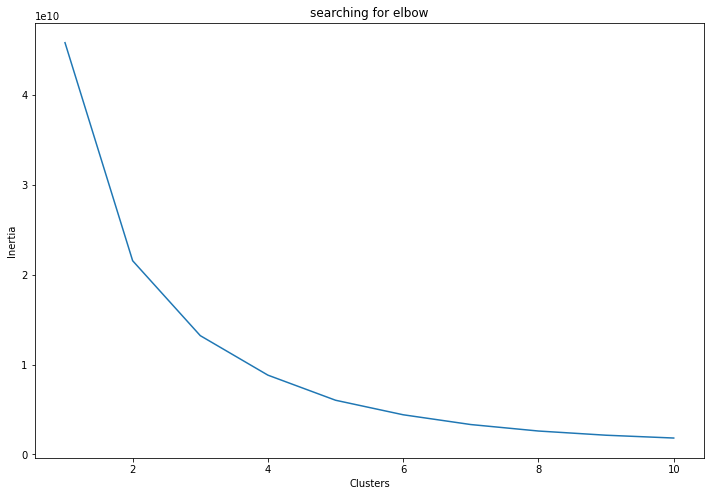

In [65]:
df_cluster = shopper.copy()


for c in range(len(non_num)):
  df_cluster[non_num[c]] = df_cluster[non_num[c]].replace(mask[c])

df_cluster['Weekend'] = df_cluster['Weekend'].astype(int) # Use 1 and 0 to represent Ture and False
df_cluster['Revenue'] = df_cluster['Revenue'].astype(int)
clusters = []

for n in range(1,11):
  km = KMeans(n_clusters=n).fit(df_cluster)
  clusters.append(km.inertia_)
  

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y = clusters, ax = ax)
ax.set_title("searching for elbow")
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")


## 6.2 visulize different cluster number for different features

Text(0.5, 1.0, 'Labels for Informational_Duration')

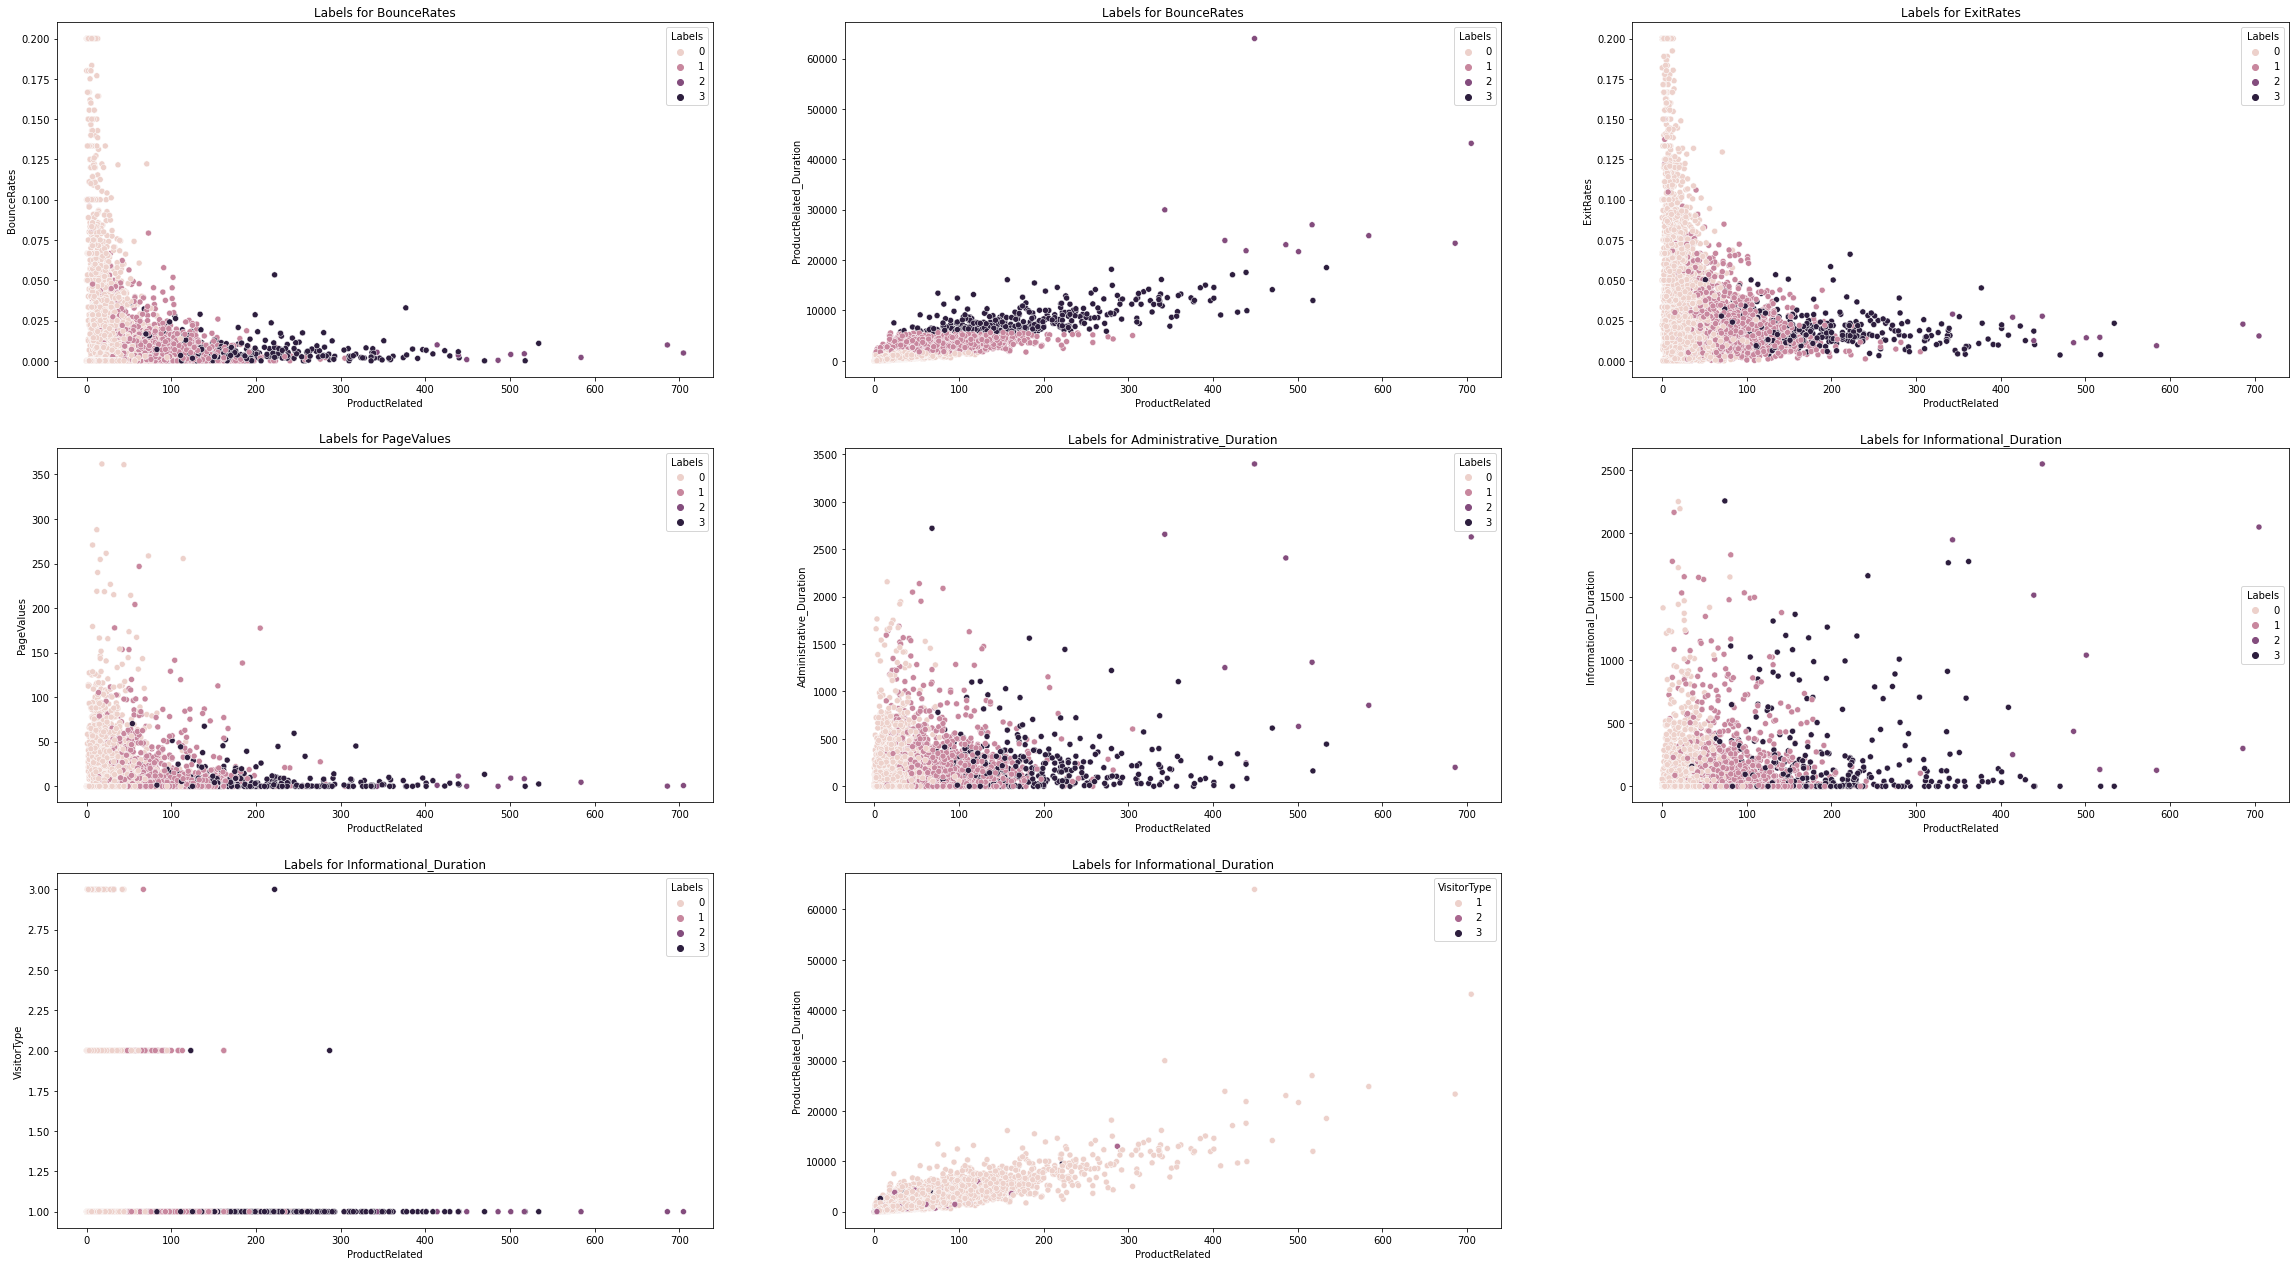

In [66]:
km = KMeans(n_clusters=4).fit(df_cluster)

df_cluster['Labels'] = km.labels_
d_false = df_cluster[df_cluster['Revenue']==0]
d_true= df_cluster[df_cluster['Revenue']==1]

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(431)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['BounceRates'],hue=df_cluster['Labels'])
plt.title("Labels for BounceRates")

ax = fig.add_subplot(432)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['ProductRelated_Duration'],hue=df_cluster['Labels'])
plt.title("Labels for BounceRates")

ax = fig.add_subplot(433)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['ExitRates'],hue=df_cluster['Labels'])
plt.title("Labels for ExitRates")

ax = fig.add_subplot(434)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['PageValues'],hue=df_cluster['Labels'])
plt.title("Labels for PageValues")


ax = fig.add_subplot(435)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['Administrative_Duration'],hue=df_cluster['Labels'])
plt.title("Labels for Administrative_Duration")

ax = fig.add_subplot(436)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['Informational_Duration'],hue=df_cluster['Labels'])
plt.title("Labels for Informational_Duration")

ax = fig.add_subplot(437)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['VisitorType'],hue=df_cluster['Labels'])
plt.title("Labels for Informational_Duration")

ax = fig.add_subplot(438)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['ProductRelated_Duration'],hue=df_cluster['VisitorType'])
plt.title("Labels for Informational_Duration")

Text(0.5, 1.0, 'Labels for VisitorType 3')

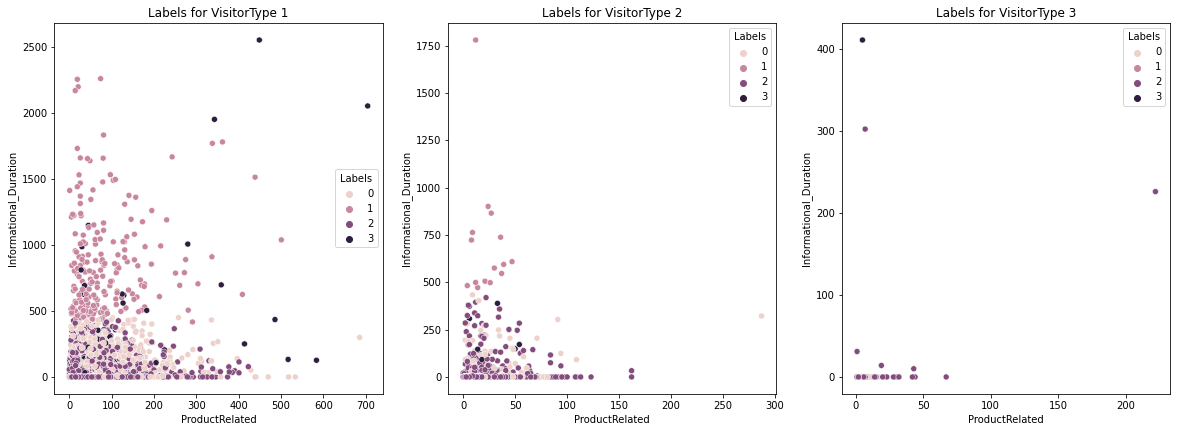

In [93]:
km = KMeans(n_clusters=4).fit(df_cluster)

df_cluster['Labels'] = km.labels_
df1 = df_cluster[df_cluster['VisitorType']==1]
df2 = df_cluster[df_cluster['VisitorType']==2]
df3 = df_cluster[df_cluster['VisitorType']==3]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(231)
sns.scatterplot(df1['ProductRelated'],df1['Informational_Duration'],hue=df_cluster['Labels'])
plt.title("Labels for VisitorType 1")


ax = fig.add_subplot(232)
sns.scatterplot(df2['ProductRelated'],df2['Informational_Duration'],hue=df_cluster['Labels'])
plt.title("Labels for VisitorType 2")

ax = fig.add_subplot(233)
sns.scatterplot(df3['ProductRelated'],df3['Informational_Duration'],hue=df_cluster['Labels'])
plt.title("Labels for VisitorType 3")

In [90]:
df1.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Labels
0,0,0.0,0,0.0,1,0.2,0.0,0.0,2,1,1,1,1,1,0,0,0


Text(0.5, 1.0, 'Labels for Informational_Duration')

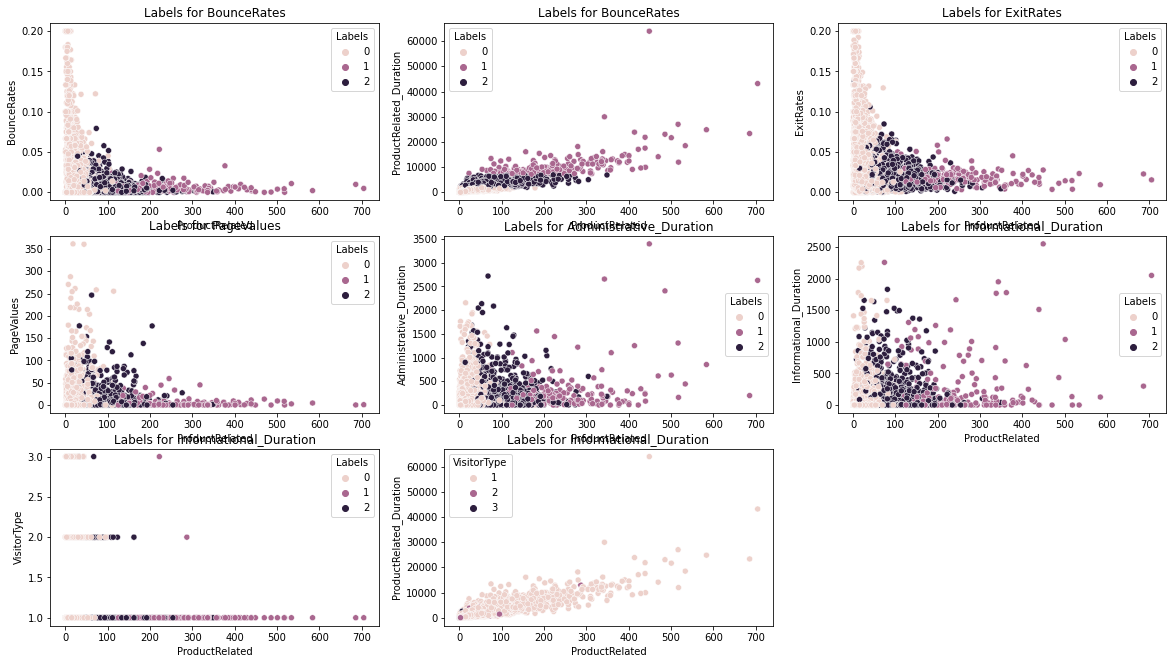

In [67]:
km = KMeans(n_clusters=3).fit(df_cluster)

df_cluster['Labels'] = km.labels_
d_false = df_cluster[df_cluster['Revenue']==0]
d_true= df_cluster[df_cluster['Revenue']==1]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(431)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['BounceRates'],hue=df_cluster['Labels'])
plt.title("Labels for BounceRates")

ax = fig.add_subplot(432)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['ProductRelated_Duration'],hue=df_cluster['Labels'])
plt.title("Labels for BounceRates")

ax = fig.add_subplot(433)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['ExitRates'],hue=df_cluster['Labels'])
plt.title("Labels for ExitRates")

ax = fig.add_subplot(434)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['PageValues'],hue=df_cluster['Labels'])
plt.title("Labels for PageValues")


ax = fig.add_subplot(435)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['Administrative_Duration'],hue=df_cluster['Labels'])
plt.title("Labels for Administrative_Duration")

ax = fig.add_subplot(436)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['Informational_Duration'],hue=df_cluster['Labels'])
plt.title("Labels for Informational_Duration")

ax = fig.add_subplot(437)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['VisitorType'],hue=df_cluster['Labels'])
plt.title("Labels for Informational_Duration")

ax = fig.add_subplot(438)
sns.scatterplot(df_cluster['ProductRelated'],df_cluster['ProductRelated_Duration'],hue=df_cluster['VisitorType'])
plt.title("Labels for Informational_Duration")

## 6.4 Hierarchy visulization of the structure

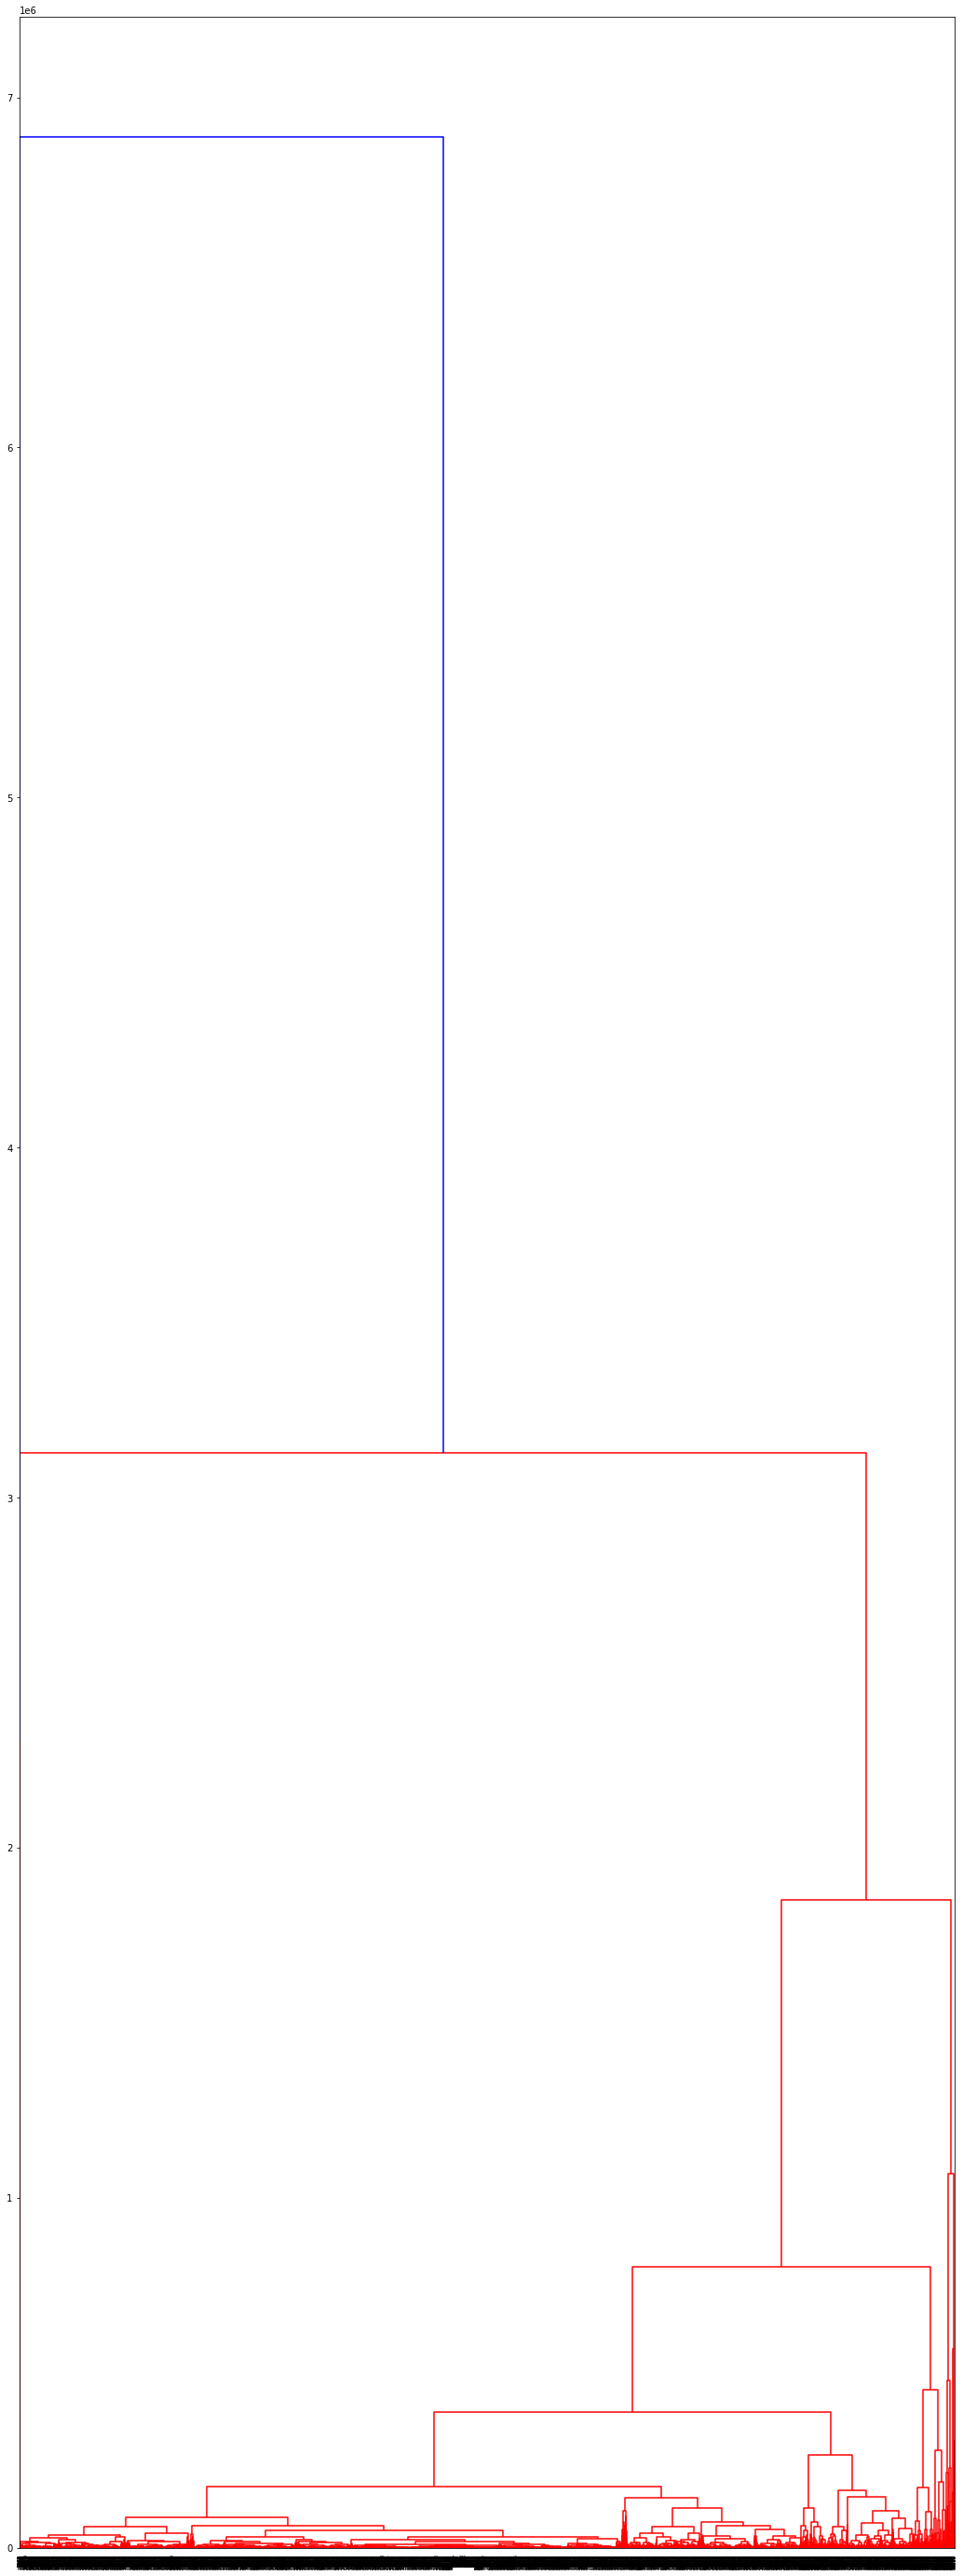

In [68]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(df_cluster, df_cluster)
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z)

## 6.5 Conclusion: KMeans clustering shows a better cluster behavior when cluster number equals 4

##7. Semi-supervised learning. 
Use June-September data to predict October-December revenue.

*use normalized values for numeric features to avoid outlier 'drawing effect'*

In [69]:
df_cluster.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Labels'],
      dtype='object')

In [70]:
df_cluster.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Labels
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,1,0,0,0


In [71]:

df_cluster = df_cluster[selected_columns]

In [72]:
print(df_cluster.shape)

(12330, 16)


### 7.1 set data for traing June-Sept., test data for oct. - Dec., and performance test data for Feb. March

In [73]:
df_semi_train = df_cluster[df_cluster['Month'].isin([6,7,8,9])]
df_semi_test = df_cluster[df_cluster['Month'].isin([10,11,12])]
df_semi_valid = df_cluster[df_cluster['Month'].isin([2,3])]


In [74]:
X_semi_train = df_semi_train.drop(columns=['Revenue'])
y_semi_train = df_semi_train[['Revenue']]
X_semi_test = df_semi_test.drop(columns=['Revenue'])
y_semi_test = df_semi_test[['Revenue']]

X_semi_valid = df_semi_valid.drop(columns=['Revenue'])
y_semi_valid = df_semi_valid[['Revenue']]

## 7.2 # use Random Forest to train the model and predict semi_test revenue for Oct.-Dec.

###7.2.1 Use SVM to predict the revenue of Oct.-Dec. Concatenate the predicted revenue with the other to form new data. We have concluded that SVM shows 100% recall for true class, so we may use it to label our data.

In [75]:
svm_label = SVC()
svm_label.fit(X_semi_train,y_semi_train)

SVC()

In [76]:
y_semi_test_pred = pd.DataFrame(svm_label.predict(X_semi_test),columns=['Revenue'])

In [77]:
X_semi = pd.concat([X_semi_train,X_semi_test])
y_semi_self = pd.concat([y_semi_train,y_semi_test_pred])
y_semi_orig = pd.concat([y_semi_train,y_semi_test])

In [78]:
print(X_semi.shape, y_semi_self.shape, y_semi_orig.shape)

(6875, 15) (6875, 1) (6875, 1)


###7.2.2 Performance test with validate data, self labeld data using Random Forest

In [79]:
RF.fit(X_semi, y_semi_self)
semi_pred_self = RF.predict(X_semi_valid)
print(classification_report(y_semi_valid,semi_pred_self))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1896
           1       0.82      0.45      0.58       195

    accuracy                           0.94      2091
   macro avg       0.88      0.72      0.77      2091
weighted avg       0.93      0.94      0.93      2091



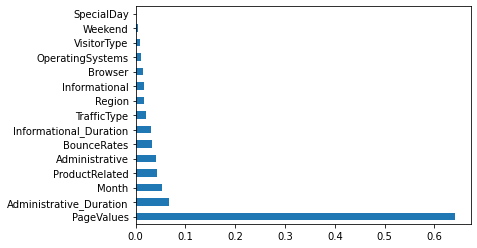

In [80]:
pd.Series(RF.feature_importances_, index=X_semi.columns).nlargest(15).plot(kind='barh')

###7.2.3 Performance of original data with validate data

In [81]:
RF.fit(X_semi, y_semi_orig)
semi_pred_orig = RF.predict(X_semi_valid)
print(classification_report(y_semi_valid,semi_pred_orig))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1896
           1       0.78      0.62      0.69       195

    accuracy                           0.95      2091
   macro avg       0.87      0.80      0.83      2091
weighted avg       0.94      0.95      0.95      2091



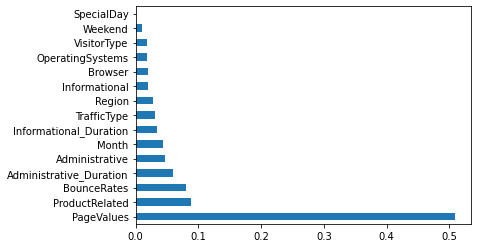

In [82]:
pd.Series(RF.feature_importances_, index=X_semi.columns).nlargest(15).plot(kind='barh')

### 7.2.4 Performance using only June-September data

In [83]:
RF.fit(X_semi_train, y_semi_train)
semi_pred_J = RF.predict(X_semi_valid)
print(classification_report(y_semi_valid,semi_pred_J))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1896
           1       0.78      0.54      0.64       195

    accuracy                           0.94      2091
   macro avg       0.87      0.76      0.80      2091
weighted avg       0.94      0.94      0.94      2091



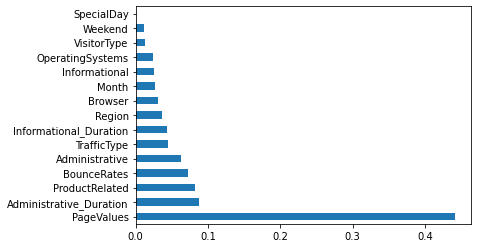

In [84]:
pd.Series(RF.feature_importances_, index=X_semi.columns).nlargest(15).plot(kind='barh')

## 7.3 Conclusion:
* Self-labeled data gave worse recall and f1 score than original data. 
* Low recall, i.e.'true' class predition are low for both. For self-labeled data, it is ~40% lower than original data.
* Both methods showed the similar precision and 'False' class recall rate. 
* If we have missing data, semi-supervised learning could be good method to use.
* Feature importance varies depend on what data to use.